## Load data and extract 3's and 7's

In [298]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math


In [442]:
mnist = loadmat("mnist.mat")
data = mnist['mnist']
X_train = np.array(data[0][0][0])
X_test  = np.array(data[0][0][1])
Y_train = np.array(data[0][0][2])
Y_test = np.array(data[0][0][3])



In [443]:
tr_indices = [i for i in range(len(Y_train)) if Y_train[i]==3 or Y_train[i]==7]
Y_train = Y_train[tr_indices]
X_train = X_train[:,:,tr_indices]

te_indices = [i for i in range(len(Y_test)) if Y_test[i]==3 or Y_test[i]==7]
Y_test = Y_test[te_indices]
X_test = X_test[:,:,te_indices]

In [444]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(28, 28, 12396)
(12396, 1)
(28, 28, 2038)
(2038, 1)


## I hereby declare all 3's to be 0's and 7's to be 1's

In [445]:
Y_train = np.array([0 if i==3 else 1 for i in Y_train])
Y_test = np.array([0 if i==3 else 1 for i in Y_test])
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [474]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [475]:
def predict(weights,X):
    z = np.sum((np.multiply(weights,X.T)),axis=(1,2))
    z = np.array([sigmoid(i) for i in z])
    return z

In [476]:
def NLL(predictions,targets):
    epsilon = 1e-5
    return -np.multiply((1/predictions.shape[0]),np.sum((np.multiply(targets,np.log(epsilon+ predictions)) + np.multiply((np.ones(targets.shape)-targets),(np.log(epsilon + np.ones(predictions.shape)-predictions))))))

In [477]:
def gradient(predictions,targets,inputs):
    return np.multiply((1/predictions.shape[0]),np.sum(np.multiply((predictions-targets),inputs),axis=2))

In [495]:
def weight_update(weights,gradient,eta):
    return -eta*gradient

In [520]:
def train(X_train,X_test,Y_train,Y_test,weights,epochs):
    eta = 0.2
    train_errors = []
    test_errors = []
    best_loss = 1000
    gradients = []
    eta_count = 0
    for i in range(0,epochs):
        p_train = predict(weights,X_train)
        p_test = predict(weights,X_test)
        train_loss = NLL(p_train,Y_train)
        test_loss = NLL(p_test,Y_test)
        if train_loss > best_loss:
            eta_count += 1
            if eta_count == 20:
                eta_count = 0
                eta *= 0.5
        else:
            best_loss = train_loss
            eta_count = 0
        train_errors.append(train_loss)
        test_errors.append(test_loss)
        grad = gradient(p_train,Y_train,X_train)
        gradients.append(grad)
        weights += weight_update(weights,grad,eta)
    return p, train_errors,test_errors, weights, gradients

In [525]:
import time
weights = np.random.standard_normal((28,28))
start = time.time()
p, train_errors,test_errors, weights,gradients = train(X_train,X_test,Y_train,Y_test,weights,3000)
end = time.time()
print(end - start)

276.1777081489563


In [526]:
epochs = np.arange(3000)

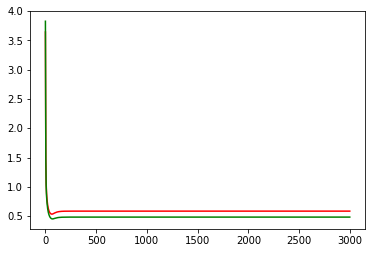

In [527]:
plt.plot(epochs,train_errors,color="red")
plt.plot(epochs,test_errors,color="green")
plt.show()

In [531]:
p_train = predict(weights,X_train)
p_test = predict(weights,X_test)

In [532]:
train_error = NLL(p_train,Y_train)
test_error = NLL(p_test,Y_test)

In [533]:
print(train_error)
print(test_error)

0.5875473098236772
0.4857397263097848


AttributeError: module 'numpy' has no attribute 'softmax'